<a href="https://colab.research.google.com/github/ashleydabb/IS-4487/blob/main/Week_9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')

print (df)

Mounted at /content/gdrive
       answered  income  female  age  job  num_dependents  rent  own_res  \
0             1   13520       0   23    0               1     1        0   
1             0   14780       0   22    2               1     0        1   
2             1   37570       0   62    2               1     0        0   
3             0   12450       0   33    2               1     0        1   
4             0   12400       0   48    1               2     0        0   
...         ...     ...     ...  ...  ...             ...   ...      ...   
29499         1   11630       0   44    2               1     0        1   
29500         0   28640       0   34    1               2     0        1   
29501         1   34480       0   74    1               1     0        1   
29502         1   10550       0   30    2               1     0        1   
29503         0  125790       0   44    3               1     0        0   

       new_car  chk_acct  sav_acct  num_accts  mobile  produ

In [3]:
 #delete rows with outlier data and remove negative income; put it in a new dataframe

df_clean = df[(df['num_accts'] < 4) & (df['income']>0) ]

#delete any rows with missing values in the clean dataframe

df_clean = df_clean.dropna() 

df_clean.describe()



,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000
mean,0.528349,33521.172135,0.051059,32.455268,1.863650,1.113662,0.230165,0.693114,0.238645,1.468499,0.863162,1.832216,0.076677,1.363539
std,0.499207,28559.921841,0.220123,10.104612,0.664615,0.317407,0.420947,0.461212,0.426265,1.228968,1.415410,0.880855,0.266084,1.516498
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13820.000000,0.000000,25.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,23230.000000,0.000000,30.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,40385.000000,0.000000,36.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,4.000000


In [4]:
df_clean['answered'] = df['answered'].astype('category')

In [5]:
# Recode the variable "answered" which is coded 0/1.  Turn 1 into  "yes" and  0 into "no," then turn it into a categorical variable.

df_clean['answered'] = df_clean['answered'].map({1:'yes', 0:'no'})


In [6]:
df_clean

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,yes,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,no,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
3,no,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
5,yes,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,yes,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,no,31900,0,24,2,1,0,1,0.0,0,0,2,0,0
29499,yes,11630,0,44,2,1,0,1,1.0,3,2,2,0,4
29500,no,28640,0,34,1,2,0,1,0.0,2,0,2,0,0
29501,yes,34480,0,74,1,1,0,1,0.0,3,0,3,0,4


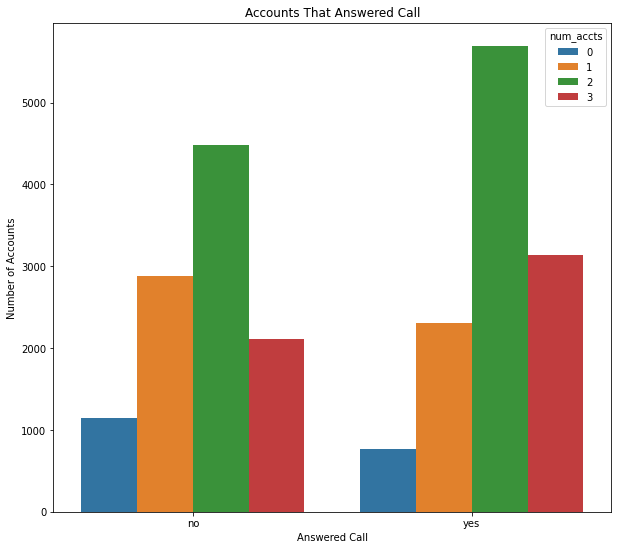

In [7]:
# Plot "answered" against "num_accts". 

#create a bar chart, histogram, or scatter for at least three variables, showing their relationship with the target variable
# I am choosing bar chart

plt.figure(figsize=(10, 9))
sns.countplot(data=df_clean, x='answered', hue='num_accts')
plt.title('Accounts That Answered Call')
plt.xlabel('Answered Call')
plt.ylabel('Number of Accounts')
  # Add a border to the bars
edgecolor = 'black'
plt.show()


# Comment on what you see in the plot and its possible meaning

In [8]:
# Turn "mobile" into a categorical variable. Your plot will work better with this change.
df_clean['mobile'] = df['mobile'].astype('category')




In [10]:
#table that counts for answered at each level of mobile
df_clean.value_counts(["answered", "mobile"])

answered  mobile
yes       0         10621
no        0         10175
yes       1          1279
no        1           448
dtype: int64

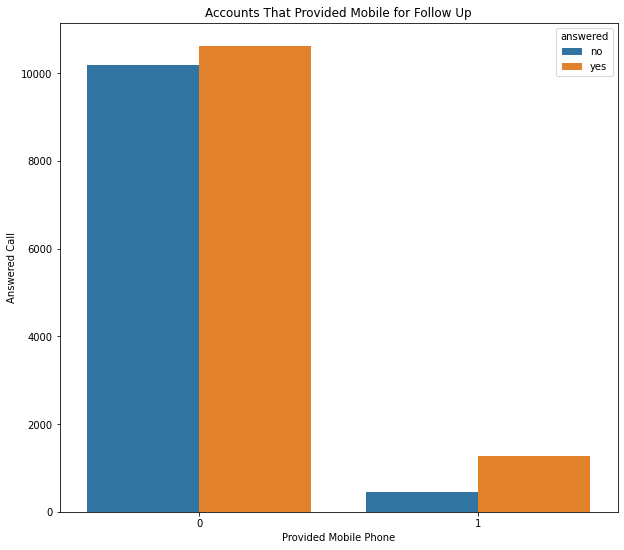

In [14]:
# Create a table of the counts for "answered" at each level of "mobile."   
plt.figure(figsize=(10, 9))
sns.countplot(data=df_clean, x='mobile', hue='answered')
plt.title('Accounts That Provided Mobile for Follow Up')
plt.xlabel('Provided Mobile Phone')
plt.ylabel('Answered Call')
  # Add a border to the bars
edgecolor = 'black'
plt.show()
# Send the resulting two summary table into your charting tool 